本脚本研究cv2.minAreaRect的角度问题

结果显示：
1. 返回的角度在[0,90]之间
2. 计算角度前需要确定初始状态，cv2.minAreaRect的初始状态是短边和x轴平行
3. 逆时针和顺时针的角度无法区分

In [1]:
# 导入阅读代码工具
import sys
import os.path as osp
sys.path.append('/home/wushaogui/ReadCode/')
from my_read_code_tools import *

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

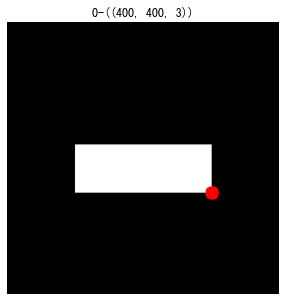

In [3]:
# 生成模拟图片
image = np.zeros((400, 400,3), dtype='uint8')
image[180:251, 100:301,:] = 255
cv2.circle(image,(301,251),10,(255,0,0),thickness=-1)
show_images([image])

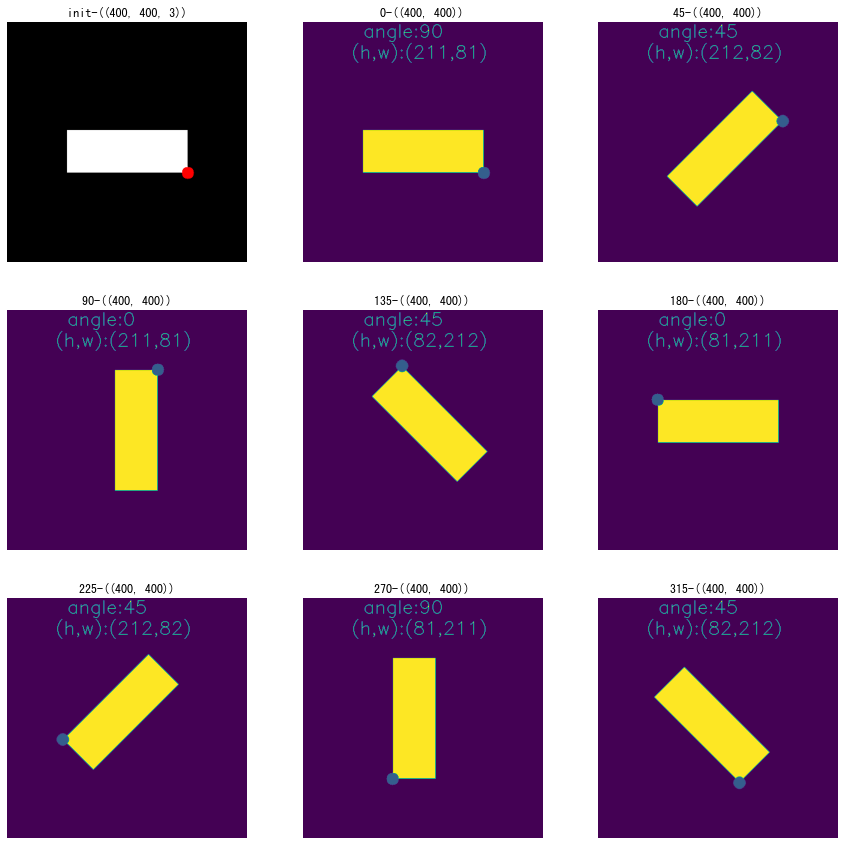

In [10]:
# 模拟旋转角度
images=[image]
titles=['init']
for angle1 in list(range(0, 360, 45)):
    rotated = imutils.rotate(image.copy(), angle1)
    rotated=cv2.cvtColor(rotated,cv2.COLOR_RGB2GRAY)
    try:
        _, contours, hierarchy = cv2.findContours(rotated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    except ValueError:
        contours, hierarchy = cv2.findContours(rotated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    rotatedRect = cv2.minAreaRect(contours[0])

    angle = rotatedRect[-1]
    w, h = rotatedRect[1]
    x,y = rotatedRect[0]
    
    # print('x:{}\t,x:{}\t,x:{}\t,x:{}\t,x:{}\t,'.format(x,y,w,h,angle))
    cv2.putText(rotated, 'angle:' + str(int(angle)), (100, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, 255)
    cv2.putText(rotated, '(h,w):({0},{1})'.format(int(h), int(w)), (80, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, 255)
    
    images.append(rotated)
    titles.append(str(angle1))

show_images(images,titles=titles)

结论：

1. 角度为x轴顺时针旋转，第一次接触到矩形边界时的值，范围：0~90°，第一次接触的边界为宽，区分方向可以使用宽、高的值来确定
2. 角度按逆时针旋转方式调整为

```python
if rect[1][0] > rect[1][1]: # w > h 
    angle = int(rect[2]) 
else: 
    angle = -(90 - int(rect[2]))
```